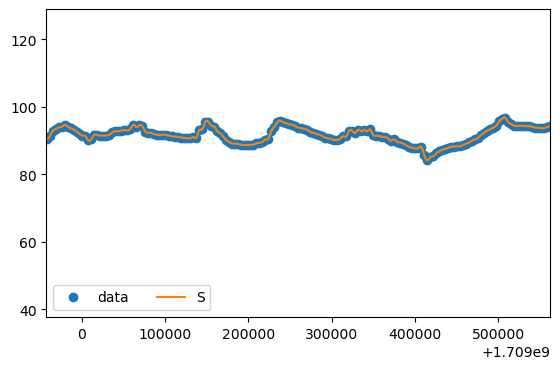

In [14]:
import os
import sys
sys.path.append("BEE_WEATHER_DATA")
from BEE_WEATHER_DATA import BROODMINDER_GET, AMBIENT_GET, BROODMINDER_PANDAS, READ_HIVE, READ_BEE_WEATHER
import pandas as pd
from glob import glob
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

hive_name = "New Left Hive"

# Bee_Weather = READ_BEE_WEATHER()
# display(Bee_Weather)

def PROCESS_HIVE(hive_name):
    Hive = READ_HIVE(hive_name)
    Unique_Dev_Names = Hive.Hive_Position.unique()
    Unique_Devs = Hive.Device.unique()
    Devices = {}
    for i, Device in enumerate(Unique_Devs):
        Devices.update({Unique_Dev_Names[i]: Hive[Hive['Device'] == Device]})
    x = Devices[list(Devices.keys())[0]]["Unix_Time"]
    y = Devices[list(Devices.keys())[0]]["Weight"]
    cs = CubicSpline(x, y)
    xs = np.arange(min(x), max(x), 300)
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(x, y, 'o', label='data')
    ax.plot(xs, cs(xs), label="S")
    ax.set_xlim(max(x)-604800, max(x))
    ax.legend(loc='lower left', ncol=2)
    plt.show()
    
    # # RightScale resampled and interpolated to five minutes (no humidity measurements)
    # RightScale = RightScale.set_index('Unix_Time',drop = False)
    # RightScale_upsampled = RightScale.resample('1s').mean()
    # RightScale_interpolated = RightScale_upsampled[RightScale_upsampled.columns[1::]].interpolate(method='linear')
    # RightScale_downsampled = RightScale_interpolated.resample('300s').mean()
    # RightAvg = RightScale_downsampled['Scaled_Weight'].resample('1d').mean()

PROCESS_HIVE(hive_name)
    
def PROCESS_BEE_WEATHER():
    HiveWeather = HiveWeather.set_index('Unix_Time',drop = False)
    HiveWeather_upsampled = HiveWeather.resample('1s').mean()
    HiveWeather_interpolated = HiveWeather_upsampled[HiveWeather_upsampled.columns[1::]].interpolate(method='linear')
    HiveWeather_downsampled = HiveWeather_interpolated.resample('300s').mean()

In [28]:
print(directory[0:-1] + "\/" + "New Left Hive_combined_readings_20[a-zA-Z0-9\-\_\.]*.csv")

Broodminder\/\/New Left Hive_combined_readings_20[a-zA-Z0-9\-\_\.]*.csv
